## KAGGLE TITANIC CLASSIFICATION PROJECT

#### CLASSIFICATION ALGORITHMS USED:
* K- NEAREST NEIGHBOUR
* DECISION TREES
* RANDOM FOREST
* NAIVE BAYES 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_train.shape

(891, 12)

In [11]:
df_test.shape

(418, 11)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

### Findin Null Values in Train and Test Datasets

In [14]:
df_train.isnull().sum()/len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
# Age column has 19% null values
# Cabin column has 77% null values
# Embarked column has 0.22% null values which can be ignored

In [16]:
df_test.isnull().sum()/len(df_train)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [18]:
# 'Age' column has 9% null values
# 'Cabin' column has 36% null values

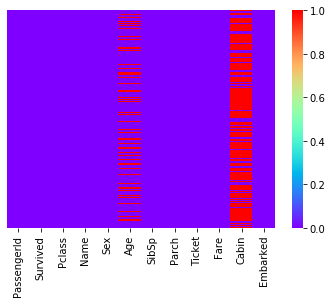

In [27]:
#heatmap representation of the training set null values
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='rainbow')

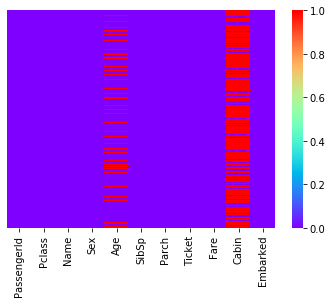

In [28]:
#heatmap representation of the testing set null values
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='rainbow')

In [29]:
# Dealing with the Age column

In [33]:
df_train.Age.mean()

29.69911764705882

### Further exploratory Data Analysis

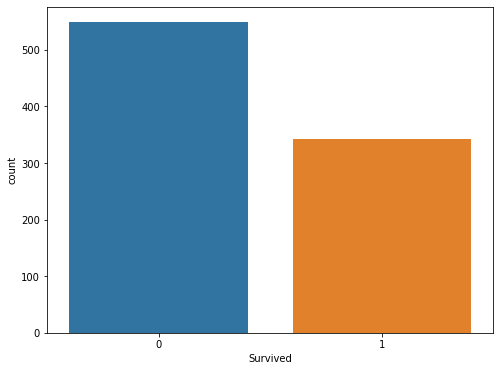

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(df_train['Survived'])

In [40]:
df_train['Survived'].value_counts()/len(df_train['Survived'])*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [41]:
# There is approximately a 60-40 distribution in the target variable column. The data is thus considered balanced.

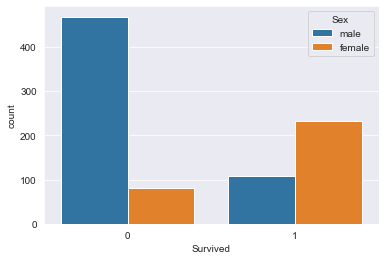

In [52]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Sex')

In [50]:
# From the countplot it is evident that people who did not survive were much more likely to be male passengers 
# and people who did survive were more likely to be female passengers


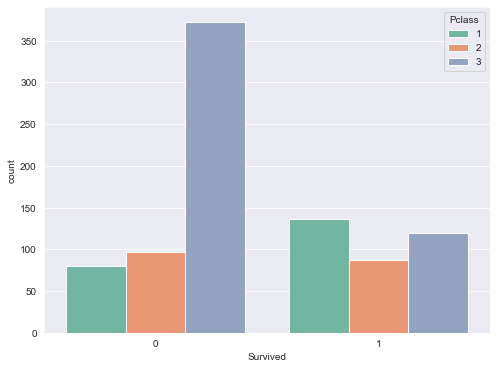

In [60]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df_train,hue='Pclass',palette='Set2')

In [61]:
# From the above plot an overwhelming number of passengers belonging to CLASS 3 did NOT survive.
# The trend is not very pronounced in the class of passengers who survived. Class 1 passengers, however, were in majority.

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

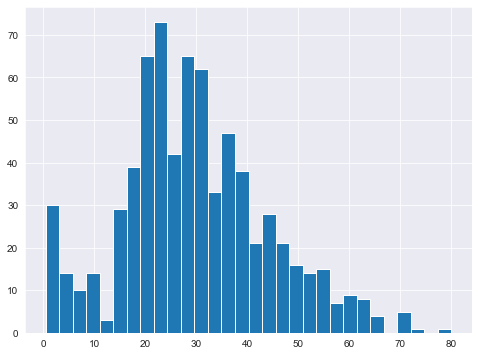

In [72]:
plt.figure(figsize=(8,6))
plt.hist(df_train['Age'],bins=30)

In [77]:
df_train['Age'].mean() # The mean age of all the passengers in the training data

29.69911764705882

## Data Cleaning: Dealing with missing values

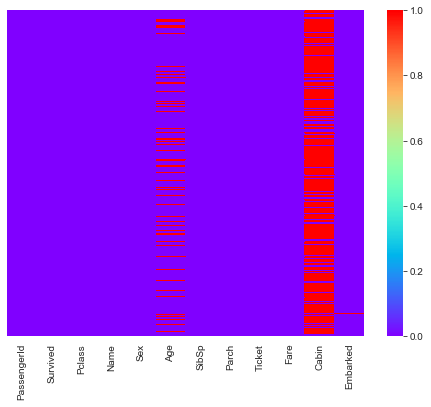

In [85]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='rainbow')

In [86]:
# Dealing with the Age column

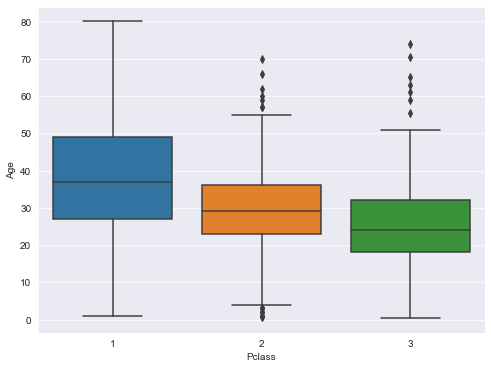

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age',data= df_train)

In [89]:
#The idea is to fill in the missing age values with the Median age values of the passengers belonging to the corresponding
# passenger classes

In [105]:
# Determining the Median age values using interactive cufflinks plot

In [107]:
import cufflinks as cf
cf.go_offline()

In [116]:
df_train.pivot(columns='Pclass', values = 'Age').iplot(kind='box')

In [118]:
# Median age of FIRST CLASS passengers = 37
# Median age of SECOND CLASS passengers = 29
# Median age of THIRD CLASS passengers = 24

In [119]:
#Creating a function to fill in the missing age values

In [123]:
def fill_age(col):
    Age= col[0]
    Pclass= col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        if Pclass==2:
            return 29
        
        if Pclass == 3:
            return 24
        
    else:
        return Age

In [124]:
df_train['Age'] = df_train[['Age','Pclass']].apply(fill_age,axis=1)

In [125]:
df_train['Age'].isnull().sum()

0

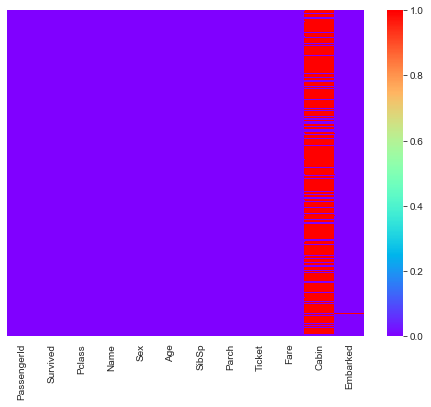

In [126]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='rainbow')

In [127]:
# The missing age values are replaced as evident from the heatmap

In [128]:
# Now replacing the age values in test data as well

In [129]:
df_test['Age'] = df_test[['Age','Pclass']].apply(fill_age,axis=1)

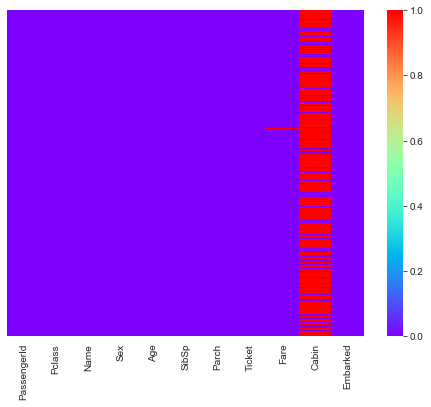

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='rainbow')

In [131]:
# The Cabin column has too many missing values in both training and testing datasets. Thus the Cabin column is dropped.

In [135]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [136]:
df_test.drop('Cabin',axis=1,inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [137]:
# The Fare column in test data has very few missing values. They are filled with the mean Fare value.

In [138]:
df_test['Fare'].mean()

35.6271884892086

In [145]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [146]:
df_test['Fare'].isnull().sum()

0

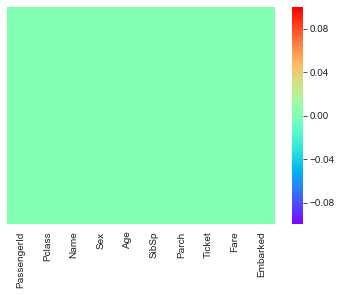

In [147]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='rainbow')

In [148]:
df_train['Embarked'].isnull().sum()

2

In [149]:
#The Embarked column of training dataset has 2 missing values. We will fill it with the most occurring value.

In [154]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [153]:
#The most occurring value is S

In [155]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

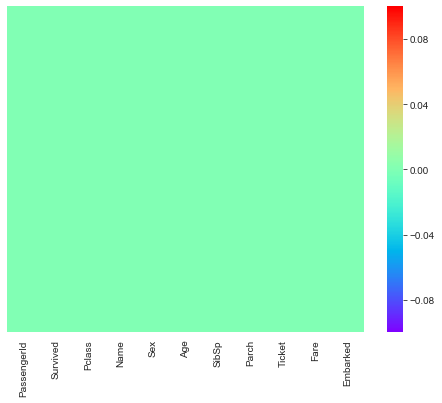

In [156]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cmap='rainbow')

In [157]:
# All missing values are dealt with in both the training and testing datasets

In [158]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [161]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [159]:
#The ticket and name columns are dropped from both datasets as they have no useful features to help in prediction

In [163]:
df_train.drop('Ticket',axis=1,inplace=True)
df_train.drop('Name',axis=1,inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [164]:
df_test.drop('Ticket',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


## Converting Categorical features 

In [165]:
# Pclass and Sex are the two categorical features

In [172]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train.drop(['Sex','Embarked'],axis=1,inplace=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [173]:
df_train = pd.concat([df_train,sex,embark],axis=1)

In [174]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [175]:
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)

In [176]:
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [177]:
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [178]:
df_test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [179]:
df_test = pd.concat([df_test,sex,embark],axis=1)

In [180]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [181]:
# Train and Test datasets are ready.

# Creating and Choosing the best model for predictions

In [267]:
train_data = df_train.drop('Survived',axis=1)
target = df_train['Survived']
test_data = df_test

In [188]:
train_data.shape

(891, 9)

In [189]:
target.shape

(891,)

In [239]:
# Importing Classifier Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [240]:
# Cross Validation : K-Fold
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [256]:
clf = KNeighborsClassifier(n_neighbors=10)
score = cross_val_score(clf, train_data, target, cv=kfold, n_jobs=1, scoring='accuracy')
score.mean()*100

65.10112359550561

In [257]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_data, target, cv=kfold, scoring='accuracy')
score.mean()*100

74.75530586766543

In [261]:
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train_data, target, cv=kfold, scoring='accuracy')
score.mean()*100

82.94007490636703

In [255]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=kfold, scoring='accuracy')
score.mean()*100

78.7852684144819

## Testing Data with Classifier with the best score (Random Forest)

In [262]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [269]:
predictions = clf.predict(test_data)

In [270]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [277]:
#FOR KAGGLE SUBMISSION ONLY
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv('submission.csv', index = False)

In [278]:
d=pd.read_csv('submission.csv')
d.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# THE END